# "Binary Classification with a Bank Churn Dataset" Competition

Submission by: Atul Parida

### Overview
This notebook contains the code and analysis for the "Binary Classification with a Bank Churn Dataset" competition on Kaggle. In this competition, the goal is to predict whether a customer continues with their account or closes it (e.g., churns) using the dataset provided. We will explore the dataset, preprocess the text data, build and evaluate models, and make predictions.

## Table of Contents
1. [Data Exploration](#data-exploration)
2. [Data Preprocessing](#data-preprocessing)
3. [Model Building](#model-building)
4. [Model Evaluation](#model-evaluation)
5. [Results and Conclusion](#results-and-conclusion)


### Data Exploration

In [1]:
### Basic imports
import os
import sys

### Library imports for data exploration
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
### Paths for all the files
cwd = os.getcwd()
train_data_path = os.path.join(cwd, 'data', 'train.csv')
test_data_path = os.path.join(cwd, 'data', 'test.csv')
sample_submission_path = os.path.join(cwd, 'data', 'sample_submission.csv')
output_path = os.path.join(cwd, 'output', 'output.csv')

In [3]:
train_data = pd.read_csv(train_data_path, encoding='utf-8')
test_data = pd.read_csv(test_data_path, encoding='utf-8')

In [4]:
train_data.head()

,id,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,0,15674932,Okwudilichukwu,668,France,Male,33.0,3,0.00,2,1.0,0.0,181449.97,0
1,1,15749177,Okwudiliolisa,627,France,Male,33.0,1,0.00,2,1.0,1.0,49503.50,0
2,2,15694510,Hsueh,678,France,Male,40.0,10,0.00,2,1.0,0.0,184866.69,0
3,3,15741417,Kao,581,France,Male,34.0,2,148882.54,1,1.0,1.0,84560.88,0
4,4,15766172,Chiemenam,716,Spain,Male,33.0,5,0.00,2,1.0,1.0,15068.83,0


In [5]:
# range of values
train_data.describe()

,id,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,165034.0000,1.650340e+05,165034.000000,165034.000000,165034.000000,165034.000000,165034.000000,165034.000000,165034.000000,165034.000000,165034.000000
mean,82516.5000,1.569201e+07,656.454373,38.125888,5.020353,55478.086689,1.554455,0.753954,0.497770,112574.822734,0.211599
std,47641.3565,7.139782e+04,80.103340,8.867205,2.806159,62817.663278,0.547154,0.430707,0.499997,50292.865585,0.408443
min,0.0000,1.556570e+07,350.000000,18.000000,0.000000,0.000000,1.000000,0.000000,0.000000,11.580000,0.000000
25%,41258.2500,1.563314e+07,597.000000,32.000000,3.000000,0.000000,1.000000,1.000000,0.000000,74637.570000,0.000000
50%,82516.5000,1.569017e+07,659.000000,37.000000,5.000000,0.000000,2.000000,1.000000,0.000000,117948.000000,0.000000
75%,123774.7500,1.575682e+07,710.000000,42.000000,7.000000,119939.517500,2.000000,1.000000,1.000000,155152.467500,0.000000
max,165033.0000,1.581569e+07,850.000000,92.000000,10.000000,250898.090000,4.000000,1.000000,1.000000,199992.480000,1.000000


array([[<Axes: title={'center': 'id'}>,
        <Axes: title={'center': 'CustomerId'}>,
        <Axes: title={'center': 'CreditScore'}>],
       [<Axes: title={'center': 'Age'}>,
        <Axes: title={'center': 'Tenure'}>,
        <Axes: title={'center': 'Balance'}>],
       [<Axes: title={'center': 'NumOfProducts'}>,
        <Axes: title={'center': 'HasCrCard'}>,
        <Axes: title={'center': 'IsActiveMember'}>],
       [<Axes: title={'center': 'EstimatedSalary'}>,
        <Axes: title={'center': 'Exited'}>, <Axes: >]], dtype=object)

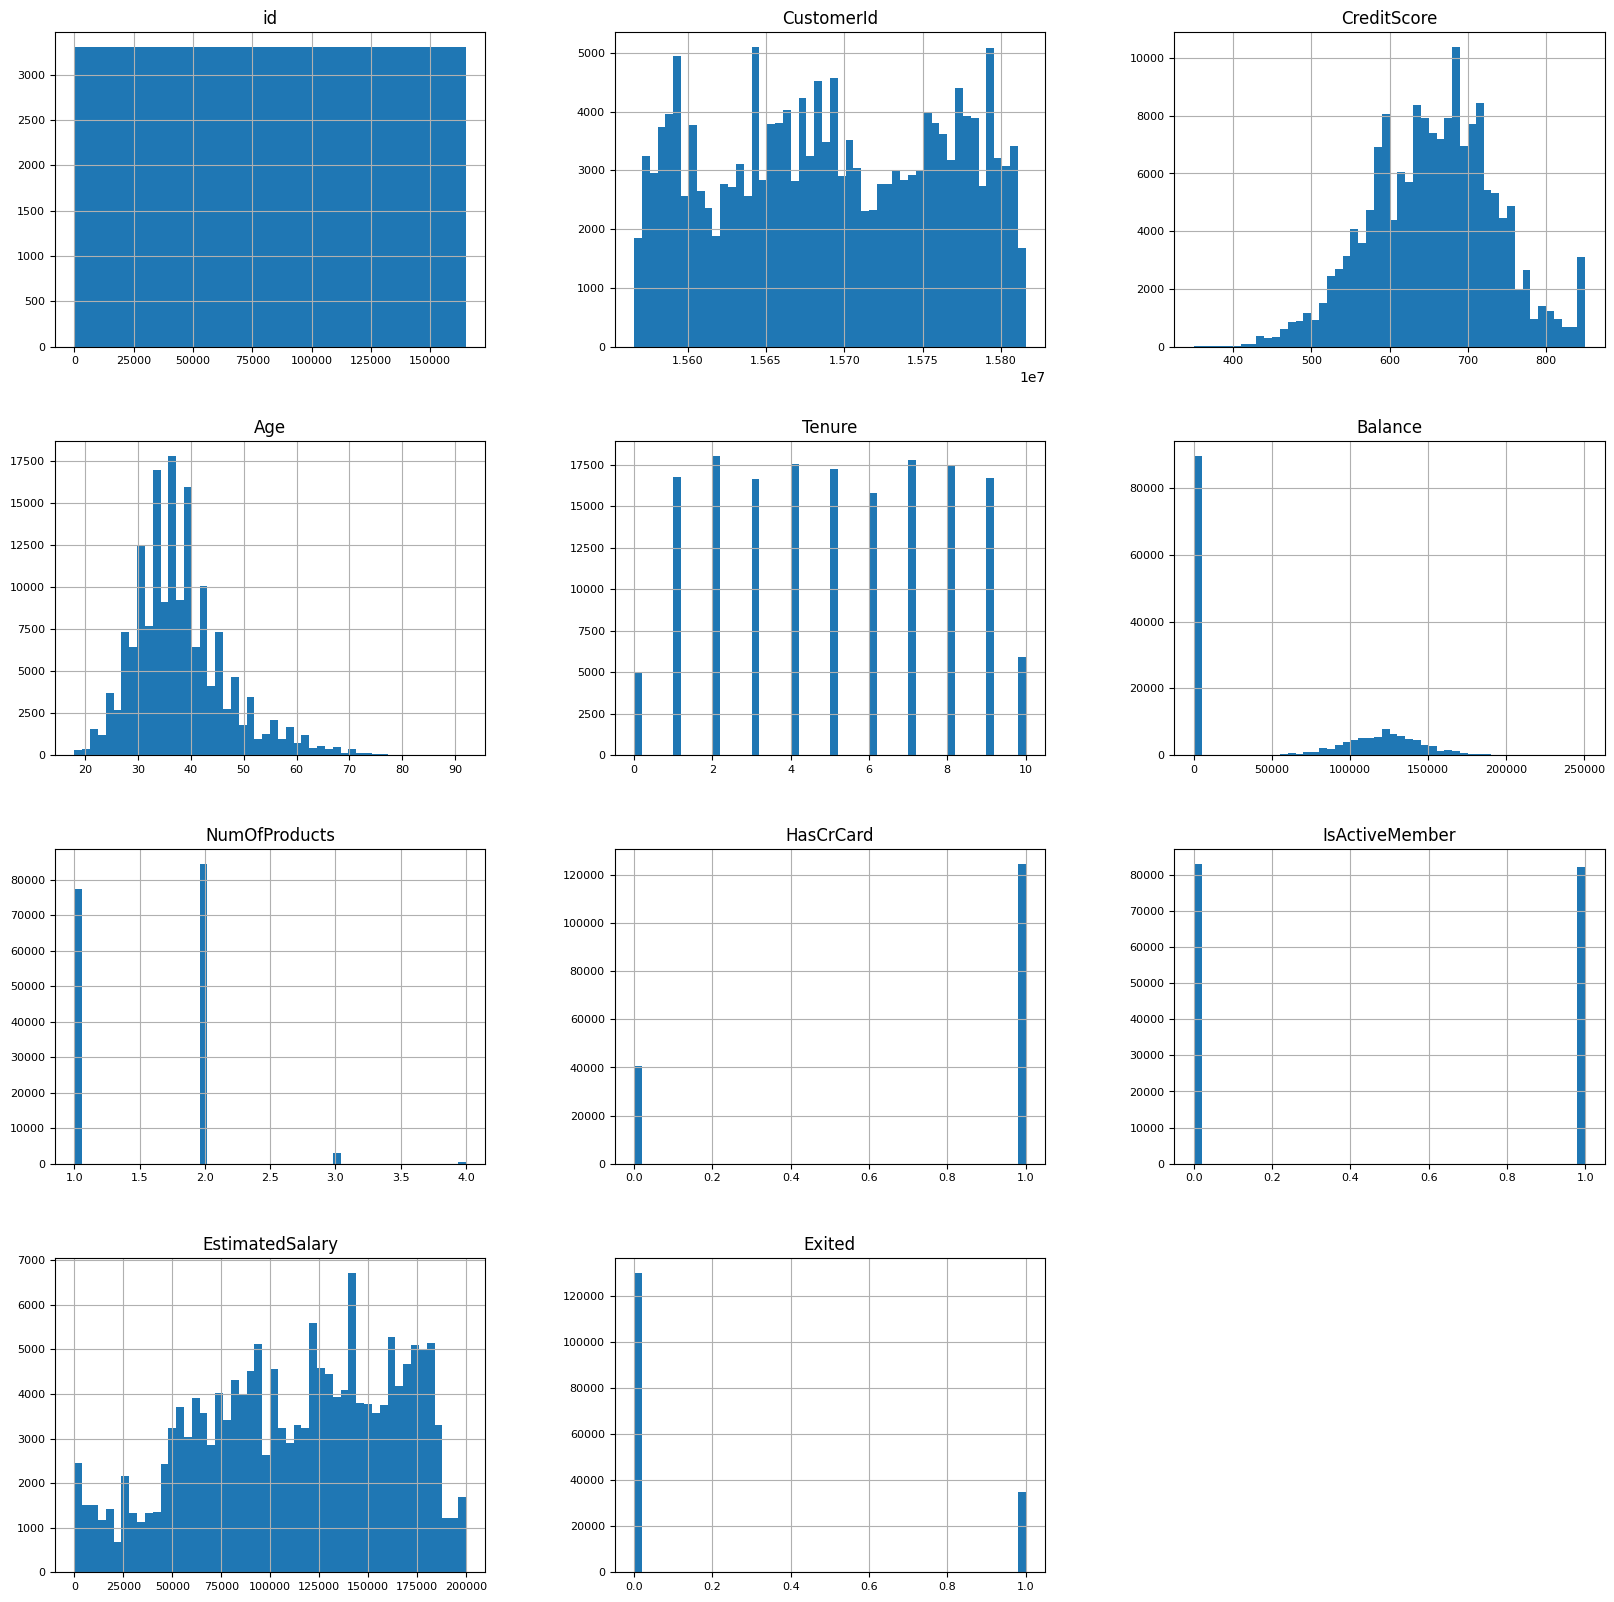

In [6]:
# graphing distributions for each column with detailed histograms
train_data.hist(figsize=(20, 20), bins=50, xlabelsize=8, ylabelsize=8)


It is apparent that the dataset is largely skewed towards the negative class. This will be important to keep in mind when building and evaluating models. Rebalancing the dataset may be necessary to improve model performance.

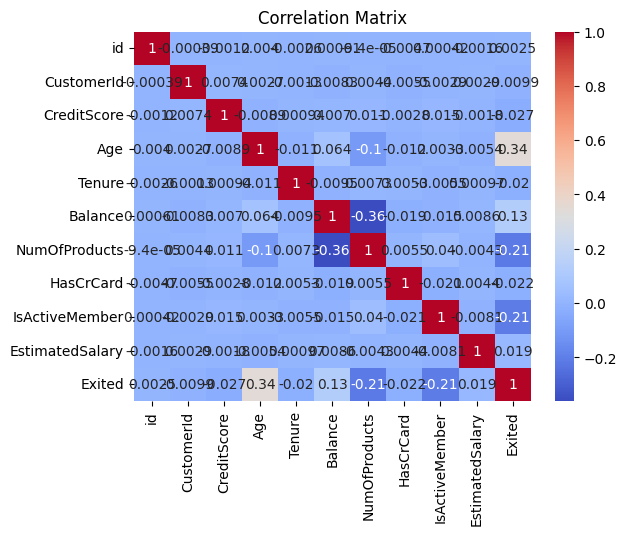

In [7]:
import seaborn as sns

# Select only the numeric columns from the dataset
numeric_columns = train_data.select_dtypes(include=np.number)

# Compute the correlation matrix
correlation_matrix = numeric_columns.corr()

# Plot the correlation matrix as a heatmap
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')

# increase size of heatmap
plt.rcParams['figure.figsize'] = [10, 10]

plt.show()





Preprocessing to be conducted:
- **Metafeature creation**:
    - *Name length*: length of individual's name
    - *Age to tenure ratio*: possibly older customers are more likely to churn
    - *Age to balance ratio*: older customers may have more money in their accounts
    - *Balance to tenure ratio*: customers with more money may be more likely to churn
    - *One-hot conversion for gender and geography*: gender and geographic location may be a factor in churn
- **Text preprocessing**: Names can be preprocessed to remove punctuation, numbers, and stopwords
- **Normalisation of data**: Age, balance, and tenure can be normalised to improve model performance
- **Rebalancing of dataset**: The dataset is largely skewed towards the negative class. Rebalancing the dataset may be necessary to improve model performance.
- **Binning of data**: Age, balance, and tenure can be binned to improve model performance

### Data Preprocessing

In [8]:
# Imports for data preprocessing
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.impute import SimpleImputer
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.decomposition import TruncatedSVD


# Imports for data modeling
from sklearn.linear_model import LogisticRegression

In [9]:

def add_metafeatures(df):
    # Entirely new metafeatures
    df["NameLen"] = df["Surname"].apply(len)
    df["Age vs Tenure"] = df["Age"] / df["Tenure"]
    df["Age vs Balance"] = df["Balance"] / df["Age"]
    df["Tenure vs Balance"] = df["Balance"] / df["Tenure"]
    return df

one_hot_cols = ["Gender", "Geography"]

def add_onehot(df):
    # One hot encoding for non-numeric columns
    for col in one_hot_cols:
        one_hot = pd.get_dummies(df[col], prefix=col)
        df = df.drop(col, axis=1)
        df = df.join(one_hot)

    return df

def normalise_parameters(df):
    cols_to_scale = ["CreditScore", "Age", "Tenure", "Balance", "NumOfProducts", "EstimatedSalary", "NameLen", "Surname_0", "Surname_1", "Surname_2", "Surname_3", "Surname_4"]

    # Normalise all parameters except one-hot encoded using standard scaler or minmax scaler
    # Make range from 0 to 1
    scaler = MinMaxScaler()
    # Scale numeric columns
    scaler.fit(df[cols_to_scale])
    df[cols_to_scale] = scaler.transform(df[cols_to_scale])
    return df

def bin_columns(df):
    # Bin the more categorical columns
    df["Age"] = pd.cut(df["Age"], bins=5, labels=False)
    df["Balance"] = pd.cut(df["Balance"], bins=10, labels=False)
    df["EstimatedSalary"] = pd.cut(df["EstimatedSalary"], bins=10, labels=False)
    df["NameLen"] = pd.cut(df["NameLen"], bins=5, labels=False)
    return df

def vectorise_text(df):
    # Vectorise text columns
    colname = "Surname"
    vectorizer = CountVectorizer()
    vectorised_text = vectorizer.fit_transform(df[colname])
    df = df.drop(colname, axis=1)

    # Use LSA to reduce dimensionality of vectorised text
    colnames = ["Surname_" + str(i) for i in range(5)]
    lsa = TruncatedSVD(n_components=5, n_iter=100, random_state=42)
    vectorised_text = lsa.fit_transform(vectorised_text)
    vectorised_text = pd.DataFrame(vectorised_text, columns=colnames)
    df = df.join(vectorised_text)
    return df

def drop_columns(df):
    # Drop columns that are not useful
    df = df.drop("CustomerId", axis=1)
    
    for col in df.columns:
        # use imputer to fill in missing values
        # replace inf values with nan
        df[col] = df[col].replace([np.inf, -np.inf], np.nan)

        imputer = SimpleImputer(strategy="median")
        imputer.fit(df[[col]])

        df[col] = imputer.transform(df[[col]]).ravel()
    return df

def preprocess_data(dff):
    df = dff.copy()
    # Drop the row number column
    df = add_metafeatures(df)
    print("Added metafeatures")
    df = vectorise_text(df)
    print("Vectorised text")
    df = bin_columns(df)
    print("Binned columns")
    df = add_onehot(df)
    print("Added one-hot encoding")
    df = normalise_parameters(df)
    print("Normalised parameters")
    df = drop_columns(df)
    print("Dropped columns")
    return df

pp_train_data = preprocess_data(train_data)
pp_train_data.describe()

# preprocess test data
pp_test_data = preprocess_data(test_data)

Added metafeatures
Vectorised text
Binned columns
Added one-hot encoding
Normalised parameters
Dropped columns
Added metafeatures
Vectorised text
Binned columns
Added one-hot encoding
Normalised parameters
Dropped columns


In [10]:
# Find feature importances
from sklearn.feature_selection import SelectKBest, chi2

X = pp_train_data.drop("Exited", axis=1)
y = pp_train_data["Exited"]

# apply SelectKBest class to extract top 15 best features
bestfeatures = SelectKBest(score_func=chi2, k=10)
fit = bestfeatures.fit(X, y)
dfscores = pd.DataFrame(fit.scores_)
dfcolumns = pd.DataFrame(X.columns)

# concat two dataframes for better visualization
featureScores = pd.concat([dfcolumns, dfscores], axis=1)
featureScores.columns = ['Specs', 'Score']  # naming the dataframe columns
print(featureScores.nlargest(10, 'Score'))  # print 10 best features

# Remove the least important features
pp_train_data = pp_train_data.drop(["Surname_3", "Surname_4", "Balance"], axis=1)
pp_test_data = pp_test_data.drop(["Surname_3", "Surname_4", "Balance"], axis=1)

                Specs         Score
12  Tenure vs Balance  6.503680e+07
11     Age vs Balance  1.082700e+06
0                  id  2.864932e+04
10      Age vs Tenure  1.539525e+04
21  Geography_Germany  5.809743e+03
7      IsActiveMember  3.663484e+03
18      Gender_Female  1.997614e+03
2                 Age  1.730553e+03
19        Gender_Male  1.541562e+03
5       NumOfProducts  1.367337e+03


In [11]:
# Def to test whether oversampling or undersampling works
def test_sampling(X, y, model, sampling_method):
    # Split the data into training and test sets
    from sklearn.model_selection import train_test_split
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.2, random_state=42)
    
    # Train the model
    model.fit(X_train, y_train)

    # Predict on the test set
    y_pred = model.predict(X_test)

    # Evaluate the model
    from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
    print("Sampling method: ", sampling_method)
    print("Accuracy: ", accuracy_score(y_test, y_pred))
    print("Precision: ", precision_score(y_test, y_pred))
    print("Recall: ", recall_score(y_test, y_pred))
    print("F1: ", f1_score(y_test, y_pred))

In [12]:
# Balance the dataset due to imbalance in target value
from imblearn.over_sampling import SMOTE

X = pp_train_data.drop(["Exited","id"], axis=1)
y = pp_train_data["Exited"]

# Before
print("Before oversampling")
print(y.value_counts())

oversample = SMOTE()
X_oversampled, y_oversampled = oversample.fit_resample(X, y)

# After
print("After oversampling")
print(y.value_counts())

from imblearn.under_sampling import RandomUnderSampler

# Before
print("Before undersampling")
print(y.value_counts())

undersample = RandomUnderSampler()

X_undersampled, y_undersampled = undersample.fit_resample(X, y)

# After
print("After undersampling")
print(y.value_counts())

# Print the results of the model with oversampling
test_sampling(X_oversampled, y_oversampled, LogisticRegression(), "oversampling")

# Print the results of the model with undersampling
test_sampling(X_undersampled, y_undersampled, LogisticRegression(), "undersampling")

Before oversampling
Exited
0.0    130113
1.0     34921
Name: count, dtype: int64
After oversampling
Exited
0.0    130113
1.0     34921
Name: count, dtype: int64
Before undersampling
Exited
0.0    130113
1.0     34921
Name: count, dtype: int64
After undersampling
Exited
0.0    130113
1.0     34921
Name: count, dtype: int64
Sampling method:  oversampling
Accuracy:  0.5002882065864812
Precision:  0.5002971120706731
Recall:  0.9700437821645288
F1:  0.6601327688045581
Sampling method:  undersampling
Accuracy:  0.5008948385711217
Precision:  0.501509684070992
Recall:  0.9710537573078568
F1:  0.6614219114219114


It seems that combining oversampling and undersampling might be ideal here. We can oversample the minority class and undersample the majority class to create a more balanced dataset. We can also use SMOTE to oversample the minority class and undersample the majority class.

In [13]:
# Print the results of the model without sampling
test_sampling(X, y, LogisticRegression(), "none")


Sampling method:  none
Accuracy:  0.7915593661950495
Precision:  0.6609442060085837
Recall:  0.02214234363767074
F1:  0.04284919309961046


In [14]:
# For the final model, we will use oversampling.

### Model Building

In [15]:
# Ensemble to be used:
# 1. Random Forest - because it is robust to outliers
# 2. XGBoost - because it is fast and accurate
# 3. K-Nearest Neighbours - because it is robust to outliers and accurate

# Using two such ensemble models with oversampling and undersampling, as well as a model with the normal dataset.

# Using voting classifier to combine the models, soft voting to be used.

# Parameter tuning for all the models to be done

### Imports for data modeling
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.neighbors import KNeighborsClassifier

# import train test split
from sklearn.model_selection import train_test_split

### Imports for parameter tuning
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, log_loss

In [16]:
# Function to plot training metrics

def plot_training_metrics(model, model_type, metric="auc"): # Area under ROC curve is the default metric
    # Evaluation of train/val vs epochs

    if model_type == 'xgboost':
        data = model.evals_result()
        train_set = data['validation_0']
        val_set = data['validation_1']
    elif model_type == 'catboost':
        data = model.get_evals_result()
        train_set = data['learn']
        val_set = data['validation']
    else:
        raise ValueError("Invalid model type")
    
    epochs = len(train_set[metric])
    x_axis = range(0, epochs)
    plt.plot(x_axis, train_set[metric], label='Train')
    plt.plot(x_axis, val_set[metric], label='Validation')
    plt.legend()
    plt.ylabel(metric)
    plt.xlabel('Epochs')
    plt.title('Training metrics vs epochs')

In [17]:
# Converting data into oversampled data for training
oversample = SMOTE()

pp_train_data = pp_train_data.drop("id", axis=1)

X = pp_train_data.drop("Exited", axis=1)
y = pp_train_data["Exited"]

X, y = oversample.fit_resample(X, y)

In [18]:
# Store ids for test data submission
test_ids = pp_test_data["id"]
test_data = pp_test_data.drop("id", axis=1)

In [19]:
# Clear memory
del train_data

#### Random Forest Classifier

In [20]:


def tune_random_forest(X, y):
    # Define the parameter grid for GridSearchCV
    param_grid = {
        'n_estimators': [100, 500],
        'max_depth': [None, 5, 10],
        'min_samples_split': [2, 5, 10],
        'min_samples_leaf': [1, 4],
        'max_features': ['auto', 'sqrt'],
    }

    # Create a Random Forest Classifier
    rf = RandomForestClassifier()

    # Create GridSearchCV object
    grid_search = GridSearchCV(estimator=rf, param_grid=param_grid, cv=3, scoring='roc_auc', verbose=3, n_jobs=-1)

    # Perform grid search on the data
    grid_search.fit(X, y)

    # Print the best parameters and best score
    print("Best Parameters: ", grid_search.best_params_)
    print("Best Score: ", grid_search.best_score_)
    
    # Return the best model
    return grid_search.best_estimator_


In [21]:
# Use best estimators for model
best_rf = tune_random_forest(X, y)

# Separated tuning from final training to save time when running the notebook

Fitting 3 folds for each of 72 candidates, totalling 216 fits
[CV 1/3] END max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=100;, score=nan total time=   0.0s
[CV 3/3] END max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=5, n_estimators=100;, score=nan total time=   0.0s
[CV 3/3] END max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=100;, score=nan total time=   0.0s
[CV 1/3] END max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=5, n_estimators=500;, score=nan total time=   0.1s
[CV 2/3] END max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=100;, score=nan total time=   0.0s
[CV 2/3] END max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=5, n_estimators=500;, score=nan total time=   0.0s
[CV 3/3] END max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=500;, score=na

/opt/homebrew/lib/python3.10/site-packages/joblib/externals/loky/process_executor.py:752: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  warnings.warn(


[CV 1/3] END max_depth=None, max_features=sqrt, min_samples_leaf=4, min_samples_split=2, n_estimators=100;, score=0.880 total time=  42.5s
[CV 2/3] END max_depth=None, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n_estimators=500;, score=0.995 total time= 2.8min
[CV 3/3] END max_depth=None, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n_estimators=500;, score=0.995 total time= 2.8min
[CV 3/3] END max_depth=None, max_features=sqrt, min_samples_leaf=4, min_samples_split=2, n_estimators=100;, score=0.991 total time=  43.7s
[CV 1/3] END max_depth=None, max_features=sqrt, min_samples_leaf=4, min_samples_split=5, n_estimators=100;, score=0.880 total time=  28.9s
[CV 2/3] END max_depth=None, max_features=sqrt, min_samples_leaf=4, min_samples_split=2, n_estimators=100;, score=0.991 total time=  29.7s
[CV 3/3] END max_depth=None, max_features=sqrt, min_samples_leaf=4, min_samples_split=5, n_estimators=100;, score=0.991 total time=  38.3s
[CV 2/3] END max_depth=None

/opt/homebrew/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:425: FitFailedWarning: 
108 fits failed out of a total of 216.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
97 fits failed with the following error:
Traceback (most recent call last):
  File "/opt/homebrew/lib/python3.10/site-packages/sklearn/model_selection/_validation.py", line 729, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/opt/homebrew/lib/python3.10/site-packages/sklearn/base.py", line 1145, in wrapper
    estimator._validate_params()
  File "/opt/homebrew/lib/python3.10/site-packages/sklearn/base.py", line 638, in _validate_params
    validate_parameter_constraints(
  File "/opt/homebrew/lib/python3.10/site-package

Best Parameters:  {'max_depth': None, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 500}
Best Score:  0.9610980516852345


In [22]:
# Train the model
best_rf.fit(X, y)

# Training metrics
def rf_metrics(X, y):
    # Predict on the train set
    y_pred = best_rf.predict(X)

    # Evaluate the model
    print("Accuracy: ", accuracy_score(y, y_pred))
    print("Precision: ", precision_score(y, y_pred))
    print("Recall: ", recall_score(y, y_pred))
    print("F1: ", f1_score(y, y_pred))
    print("Log loss: ", log_loss(y, y_pred))

rf_metrics(X, y)

Accuracy:  0.9997809596274008
Precision:  0.9998616363804077
Recall:  0.999700260542759
F1:  0.9997809419496165
Log loss:  0.007895015268188942


#### XGBoost Classifier

In [23]:
def tune_xgboost_classifier(X, y):
    # Define the parameter grid for GridSearchCV
    param_grid = {
        'n_estimators': [100, 500],
        'max_depth': [None, 5, 10],
        'learning_rate': [0.01, 0.1],
        'gamma': [0, 0.1, 0.2],
        'reg_lambda': [0, 1, 10],
        'scale_pos_weight': [1, 5],
    }

    # Create a XGBoost Classifier
    xgb = XGBClassifier()

    # Create GridSearchCV object
    grid_search = GridSearchCV(estimator=xgb, param_grid=param_grid, cv=3, scoring='roc_auc', verbose=3, n_jobs=-1)

    # Perform grid search on the data
    grid_search.fit(X, y)

    # Print the best parameters and best score
    print("Best Parameters: ", grid_search.best_params_)
    print("Best Score: ", grid_search.best_score_)
    
    # Return the best model
    return grid_search.best_estimator_

In [24]:
# Use best estimators for model
best_xgb = tune_xgboost_classifier(X, y)

# Separated tuning from final training to save time when running the notebook

Fitting 3 folds for each of 216 candidates, totalling 648 fits
[CV 1/3] END gamma=0, learning_rate=0.01, max_depth=None, n_estimators=100, reg_lambda=1, scale_pos_weight=1;, score=0.876 total time=   6.4s
[CV 3/3] END gamma=0, learning_rate=0.01, max_depth=None, n_estimators=100, reg_lambda=0, scale_pos_weight=5;, score=0.962 total time=   6.6s
[CV 1/3] END gamma=0, learning_rate=0.01, max_depth=None, n_estimators=100, reg_lambda=0, scale_pos_weight=5;, score=0.876 total time=   6.7s
[CV 2/3] END gamma=0, learning_rate=0.01, max_depth=None, n_estimators=100, reg_lambda=0, scale_pos_weight=5;, score=0.962 total time=   6.7s
[CV 2/3] END gamma=0, learning_rate=0.01, max_depth=None, n_estimators=100, reg_lambda=0, scale_pos_weight=1;, score=0.964 total time=   6.8s
[CV 3/3] END gamma=0, learning_rate=0.01, max_depth=None, n_estimators=100, reg_lambda=0, scale_pos_weight=1;, score=0.965 total time=   6.8s
[CV 1/3] END gamma=0, learning_rate=0.01, max_depth=None, n_estimators=100, reg_lambd

In [25]:
# Train model
best_xgb.fit(X, y)

# Check the training metrics
def xgb_metrics(X, y):
    # Predict on the train set
    y_pred = best_xgb.predict(X)

    # Evaluate the model
    print("Accuracy: ", accuracy_score(y, y_pred))
    print("Precision: ", precision_score(y, y_pred))
    print("Recall: ", recall_score(y, y_pred))
    print("F1: ", f1_score(y, y_pred))
    print("Log loss: ", log_loss(y, y_pred))

xgb_metrics(X, y)


Accuracy:  0.9172450101065996
Precision:  0.94225850074132
Recall:  0.8889657451599763
F1:  0.9148366532604095
Log loss:  2.982792171937616


#### K-Nearest Neighbours

In [26]:
def tune_knn_classifier(X, y):
    # Define the parameter grid for GridSearchCV
    param_grid = {
        'n_neighbors': [3, 5, 7],
        'weights': ['uniform', 'distance'],
        'algorithm': ['auto', 'ball_tree', 'kd_tree'],
        'leaf_size': [10, 30, 50],
    }

    # Create a KNN Classifier
    knn = KNeighborsClassifier()

    # Create GridSearchCV object
    grid_search = GridSearchCV(estimator=knn, param_grid=param_grid, cv=3, scoring='roc_auc', verbose=3, n_jobs=-1)

    # Perform grid search on the data
    grid_search.fit(X, y)

    # Print the best parameters and best score
    print("Best Parameters: ", grid_search.best_params_)
    print("Best Score: ", grid_search.best_score_)
    
    # Return the best model
    return grid_search.best_estimator_

In [27]:
# Use best estimators for model
best_knn = tune_knn_classifier(X, y)

# Separated tuning from final training to save time when running the notebook

Fitting 3 folds for each of 54 candidates, totalling 162 fits
[CV 2/3] END algorithm=auto, leaf_size=10, n_neighbors=3, weights=distance;, score=0.889 total time= 2.7min
[CV 3/3] END algorithm=auto, leaf_size=10, n_neighbors=3, weights=distance;, score=0.890 total time= 2.7min
[CV 2/3] END algorithm=auto, leaf_size=10, n_neighbors=5, weights=uniform;, score=0.875 total time= 2.7min
[CV 1/3] END algorithm=auto, leaf_size=10, n_neighbors=3, weights=distance;, score=0.877 total time= 2.7min
[CV 1/3] END algorithm=auto, leaf_size=10, n_neighbors=3, weights=uniform;, score=0.865 total time= 2.7min
[CV 2/3] END algorithm=auto, leaf_size=10, n_neighbors=3, weights=uniform;, score=0.874 total time= 2.7min
[CV 3/3] END algorithm=auto, leaf_size=10, n_neighbors=3, weights=uniform;, score=0.875 total time= 2.7min
[CV 1/3] END algorithm=auto, leaf_size=10, n_neighbors=5, weights=uniform;, score=0.863 total time= 2.7min
[CV 3/3] END algorithm=auto, leaf_size=10, n_neighbors=5, weights=distance;, sc

In [28]:
# Train model
best_knn.fit(X, y)

# Check the training metrics
def knn_metrics(X, y):
    # Predict on the train set
    y_pred = best_knn.predict(X)

    # Evaluate the model
    print("Accuracy: ", accuracy_score(y, y_pred))
    print("Precision: ", precision_score(y, y_pred))
    print("Recall: ", recall_score(y, y_pred))
    print("F1: ", f1_score(y, y_pred))
    print("Log loss: ", log_loss(y, y_pred))

knn_metrics(X, y)

Accuracy:  0.9998155449493902
Precision:  1.0
Recall:  0.9996310898987802
F1:  0.9998155109194474
Log loss:  0.00664843391005388


#### Ensemble Creation

In [29]:
# Voting ensemble using soft voting
from sklearn.ensemble import VotingClassifier

# Create a dictionary of the models
estimators = [
    ('rf', best_rf),
    ('xgb', best_xgb),
    ('knn', best_knn),
]



# Create a voting classifier
voting_classifier = VotingClassifier(estimators, voting='soft')

# make the predictions probabilistic rather than binary

# Fit the voting classifier to the data
voting_classifier.fit(X, y)

# Predict on the test set probabilities
y_pred = voting_classifier.predict_proba(test_data)


In [30]:
# Display predictions
y_pred[:, 1]

array([0.01617235, 0.93657898, 0.02310832, ..., 0.06319628, 0.15349331,
       0.53544515])

### Model Evaluation

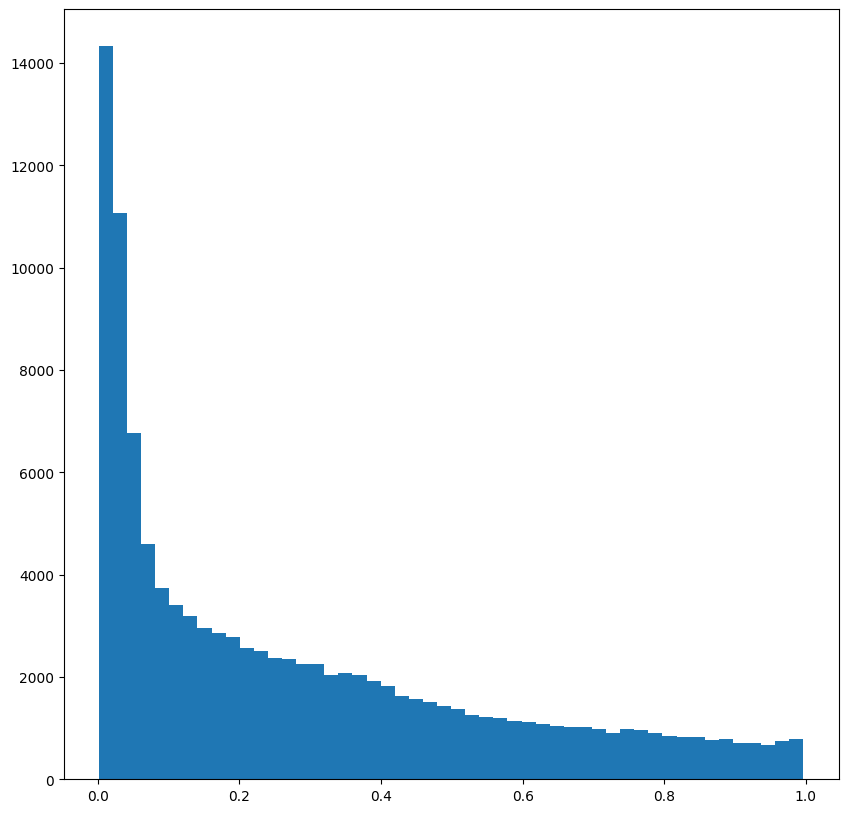

In [31]:
# Distribution of predictions vs distribution of test data
plt.hist(y_pred[:, 1], bins=50)
plt.show()

(array([130113.,      0.,      0.,      0.,      0.,      0.,      0.,
             0.,      0.,      0.,      0.,      0.,      0.,      0.,
             0.,      0.,      0.,      0.,      0.,      0.,      0.,
             0.,      0.,      0.,      0.,      0.,      0.,      0.,
             0.,      0.,      0.,      0.,      0.,      0.,      0.,
             0.,      0.,      0.,      0.,      0.,      0.,      0.,
             0.,      0.,      0.,      0.,      0.,      0.,      0.,
        130113.]),
 array([0.  , 0.02, 0.04, 0.06, 0.08, 0.1 , 0.12, 0.14, 0.16, 0.18, 0.2 ,
        0.22, 0.24, 0.26, 0.28, 0.3 , 0.32, 0.34, 0.36, 0.38, 0.4 , 0.42,
        0.44, 0.46, 0.48, 0.5 , 0.52, 0.54, 0.56, 0.58, 0.6 , 0.62, 0.64,
        0.66, 0.68, 0.7 , 0.72, 0.74, 0.76, 0.78, 0.8 , 0.82, 0.84, 0.86,
        0.88, 0.9 , 0.92, 0.94, 0.96, 0.98, 1.  ]),
 <BarContainer object of 50 artists>)

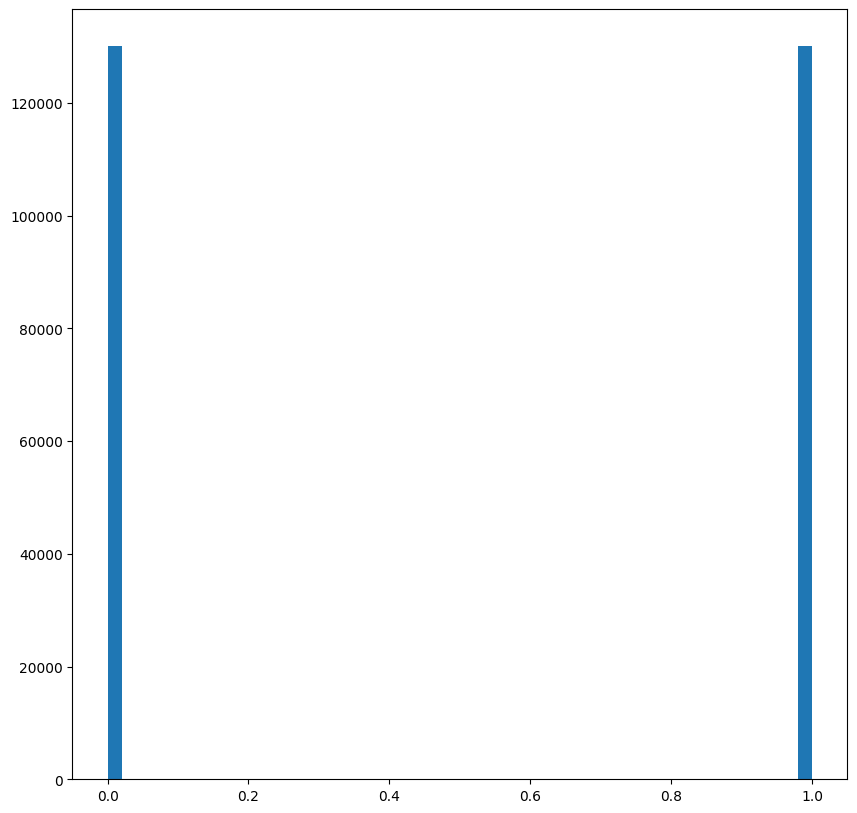

In [32]:
# Distribution of test data
plt.hist(y, bins=50)

### Results and Conclusion

In [33]:
# Create a dataframe with the id and prediction
output = pd.DataFrame({'id': test_ids, 'Exited': y_pred[:, 1]})
output.shape

(110023, 2)

In [34]:
# Save the output to a csv file
output_csv = os.path.join(cwd, 'output', 'output.csv')
output.to_csv(output_csv, index=False)